In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# 1. Data Preprocessing


In [2]:
df = pd.read_csv('finaldata.csv')

In [3]:
df.sample(10)

,labels,text
4253,ham,"महीने और साल के साथ जन्म की तारीख भेजें, मैं अ..."
4400,ham,मैं इसे प्यार करता हूँ ।
4923,ham,हाय प्रिय मुझे फोन. मैं नहीं जानता कि आपकी समस...
1854,ham,मैंने बस कुछ भुगतान किया है तो यह इतना नहीं है...
1708,ham,कल तुम्हें फोन करेंगे.
1291,ham,खाने का काम तमाम कर दिया... वर को 12 समारोह मे...
3847,ham,बैल आज यहाँ जाता है (llt;#gt; मुझे कोई बहाना न...
4592,spam,बहुत अच्छे काम किए गए हैं! अधिकारी पॉलीनानी या...
1683,ham,मुझे लगता है कि अमरीका में नौ साल की उम्र से ह...
2432,ham,यह अच्छा है. चलो भगवान का धन्यवाद करते हैं. कृ...


In [4]:
df.shape

(5572, 2)

In [5]:
df.info

<bound method DataFrame.info of      labels                                               text
0       ham  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...
1       ham                         ओके लामर.... if if uue पर.
2      spam  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3       ham  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4       ham  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...
...     ...                                                ...
5567   spam  यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....
5568    ham      क्या कलाई घर का पता लगाने के लिए जा रही होगी?
5569    ham                      तो फिर, दूसरे सुझाव क्या हैं?
5570    ham  आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...
5571    ham                     उसकी पीठ के नाम पर इसकी सच्चाई

[5572 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

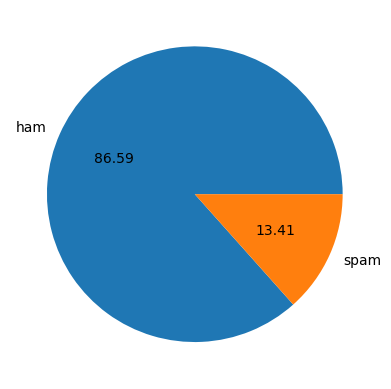

In [6]:
#plotting
plt.pie(df['labels'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show

In [7]:
# Split the dataset into input (SMS messages) and target (spam or not)

texts = df['text'].astype(str).values
labels = df['labels'].map({'ham': 0, 'spam': 1}).values
print('Texts:',texts)
print('Labels:',labels)

Texts: ['Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान विश्व cag में उपलब्ध है... वहाँ एक अधिक wack मिला...'
 'ओके लामर.... if if uue पर.'
 'Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प्रविष्टि में. पाठ FAO को 87121 में प्रविष्टि प्राप्त करने के लिए(stibook दर) TTVERVE है 0. 08375750818 के मूल्य लागू करता है'
 ... 'तो फिर, दूसरे सुझाव क्या हैं?'
 'आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और खरीदने में दिलचस्पी की तरह काम किया और वह हमें मुक्त करने के लिए दे दिया'
 'उसकी पीठ के नाम पर इसकी सच्चाई']
Labels: [0 0 1 ... 0 0 0]


In [8]:
#Tokenization and Padding
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')
print(padded_sequences)


[[  1 816  78 ...   0   0   0]
 [  1 515   1 ...   0   0   0]
 [  1 887   1 ...   0   0   0]
 ...
 [ 32  60 413 ...   0   0   0]
 [161  41   1 ...   0   0   0]
 [392   1   3 ...   0   0   0]]


# 2. Model 


In [9]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length = padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))

In [10]:
#model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#Train_test_split
train_size = int(0.8 * len(padded_sequences))
train_texts = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_texts = padded_sequences[train_size:]
test_labels = labels[train_size:]

In [12]:
#Training the model
epochs = 10 
batch_size = 32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_texts, test_labels))

Epoch 1/10


2023-07-03 10:00:42.347180: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


140/140 [==============================] - 13s 86ms/step - loss: 0.2955 - accuracy: 0.9006 - val_loss: 0.1228 - val_accuracy: 0.9552
Epoch 2/10
140/140 [==============================] - 12s 84ms/step - loss: 0.1152 - accuracy: 0.9681 - val_loss: 0.0970 - val_accuracy: 0.9659
Epoch 3/10
140/140 [==============================] - 12s 84ms/step - loss: 0.0794 - accuracy: 0.9778 - val_loss: 0.1009 - val_accuracy: 0.9686
Epoch 4/10
140/140 [==============================] - 12s 84ms/step - loss: 0.0649 - accuracy: 0.9825 - val_loss: 0.0905 - val_accuracy: 0.9686
Epoch 5/10
140/140 [==============================] - 12s 84ms/step - loss: 0.0616 - accuracy: 0.9852 - val_loss: 0.1005 - val_accuracy: 0.9686
Epoch 6/10
140/140 [==============================] - 12s 85ms/step - loss: 0.0552 - accuracy: 0.9856 - val_loss: 0.1198 - val_accuracy: 0.9686
Epoch 7/10
140/140 [==============================] - 12s 87ms/step - loss: 0.0447 - accuracy: 0.9901 - val_loss: 0.1553 - val_accuracy: 0.9623
Epo

# 3. Evaluating the Model

In [13]:
loss, accuracy = model.evaluate(test_texts, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

35/35 [==============================] - 1s 21ms/step - loss: 0.1399 - accuracy: 0.9659
Test Loss: 0.1399274617433548
Test Accuracy: 0.9659192562103271


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

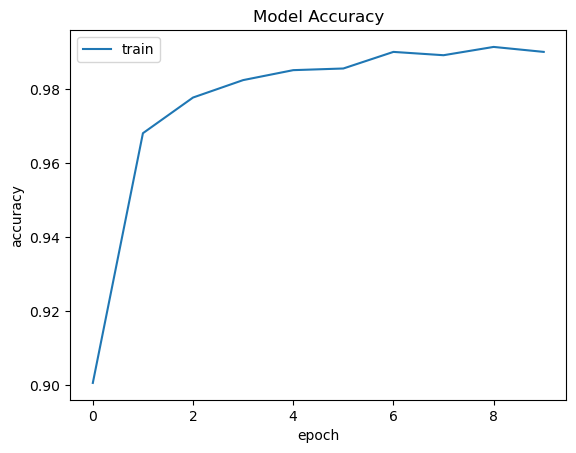

In [15]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

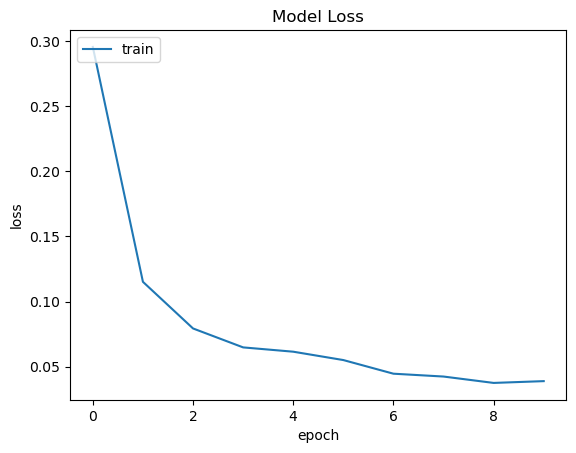

In [16]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

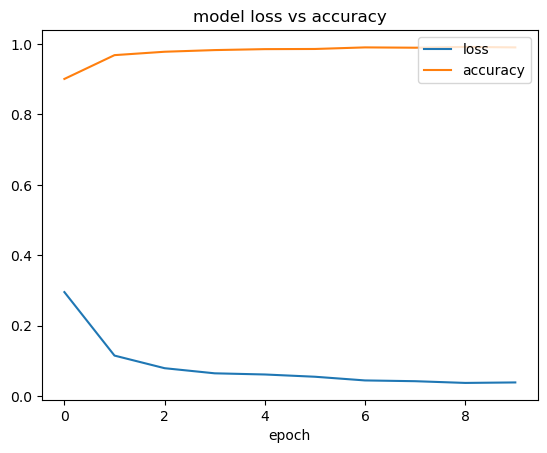

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show() 

In [18]:
tf.keras.models.save_model(model, 'my_model2.h5')

In [19]:

# Take user input
user_input = input("Enter a message: ")

# Preprocess the user input
user_sequence = tokenizer.texts_to_sequences([user_input])
user_padded_sequence = pad_sequences(user_sequence, padding='post', maxlen=padded_sequences.shape[1])

# Make prediction on user input
prediction = model.predict(user_padded_sequence)

# Interpret the prediction
if prediction >= 0.5:
    print("The message is predicted as spam.")
else:
    print("The message is predicted as not spam.")


Enter a message: hy
1/1 [==============================] - 0s 257ms/step
The message is predicted as not spam.


In [20]:
model = tf.keras.models.load_model('my_model2.h5')

# Function to preprocess the input text
def preprocess_text(text):
    # Tokenization and padding
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)
    return padded_sequences

# Function to predict spam or ham
def predict_spam(text):
    preprocessed_text = preprocess_text(text)
    prediction = model.predict(preprocessed_text)[0][0]
    return 'Spam' if prediction >= 0.5 else 'Ham'

# Load the dataset and tokenizer
df = pd.read_csv('finaldata.csv')
texts = df['text'].astype(str).values
labels = df['labels'].map({'ham': 0, 'spam': 1}).values
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
max_length = max([len(s.split()) for s in texts])

# Streamlit app
def main():
    st.title("Spam Detection")
    user_input = st.text_input("Enter a message:")
    if st.button("Predict"):
        prediction = predict_spam(user_input)
        st.write("Prediction:", prediction)

if __name__ == "__main__":
    main()





2023-07-03 10:03:26.397 
  command:

    streamlit run /Users/baqir/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [21]:


# # Load and preprocess the real-world data
# real_data = pd.read_csv('realdata.csv')
# real_texts = real_data['text'].astype(str).values
# real_sequences = tokenizer.texts_to_sequences(real_texts)
# real_padded_sequences = pad_sequences(real_sequences, padding='post')

# # Make predictions on the real-world data
# predictions = model.predict(real_padded_sequences)

# # Interpret the predictions
# for i, prediction in enumerate(predictions):
#     if prediction >= 0.5:
#         print(f"Message '{i}' is predicted as spam.")
#     else:
#         print(f"Message '{i}' is predicted as not spam.")
